In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path
path.append('./../spineSimulator/')
import plot
from simulation_parameters import simulation_parameters

from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [2]:
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

# FIgure 02
Synaptic input resistance remains stable during EPSP

Show 5 or 6 representative examples. 

    example 1 - cornecho 2022
    example 2 - cornecho altered diffusion
    example 3 - lagache high voltage
    example 4 - lagache less mobile Cl
    example 5 - high neck resistance
    example 6 - low neck resistance


/tmp/ipykernel_28217/2738867116.py:43: RuntimeWarning: invalid value encountered in true_divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:366: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(xi,1)) for xi in ax.get_xticks() * 1.e9])
/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:368: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(round(yi,1)) for yi in ax.get_yticks() * 1.e9])
/tmp/ipykernel_28217/2738867116.py:43: RuntimeWarning: invalid value encountered in true_divide
  cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)
/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:366: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(xi,1)) for xi in ax.ge

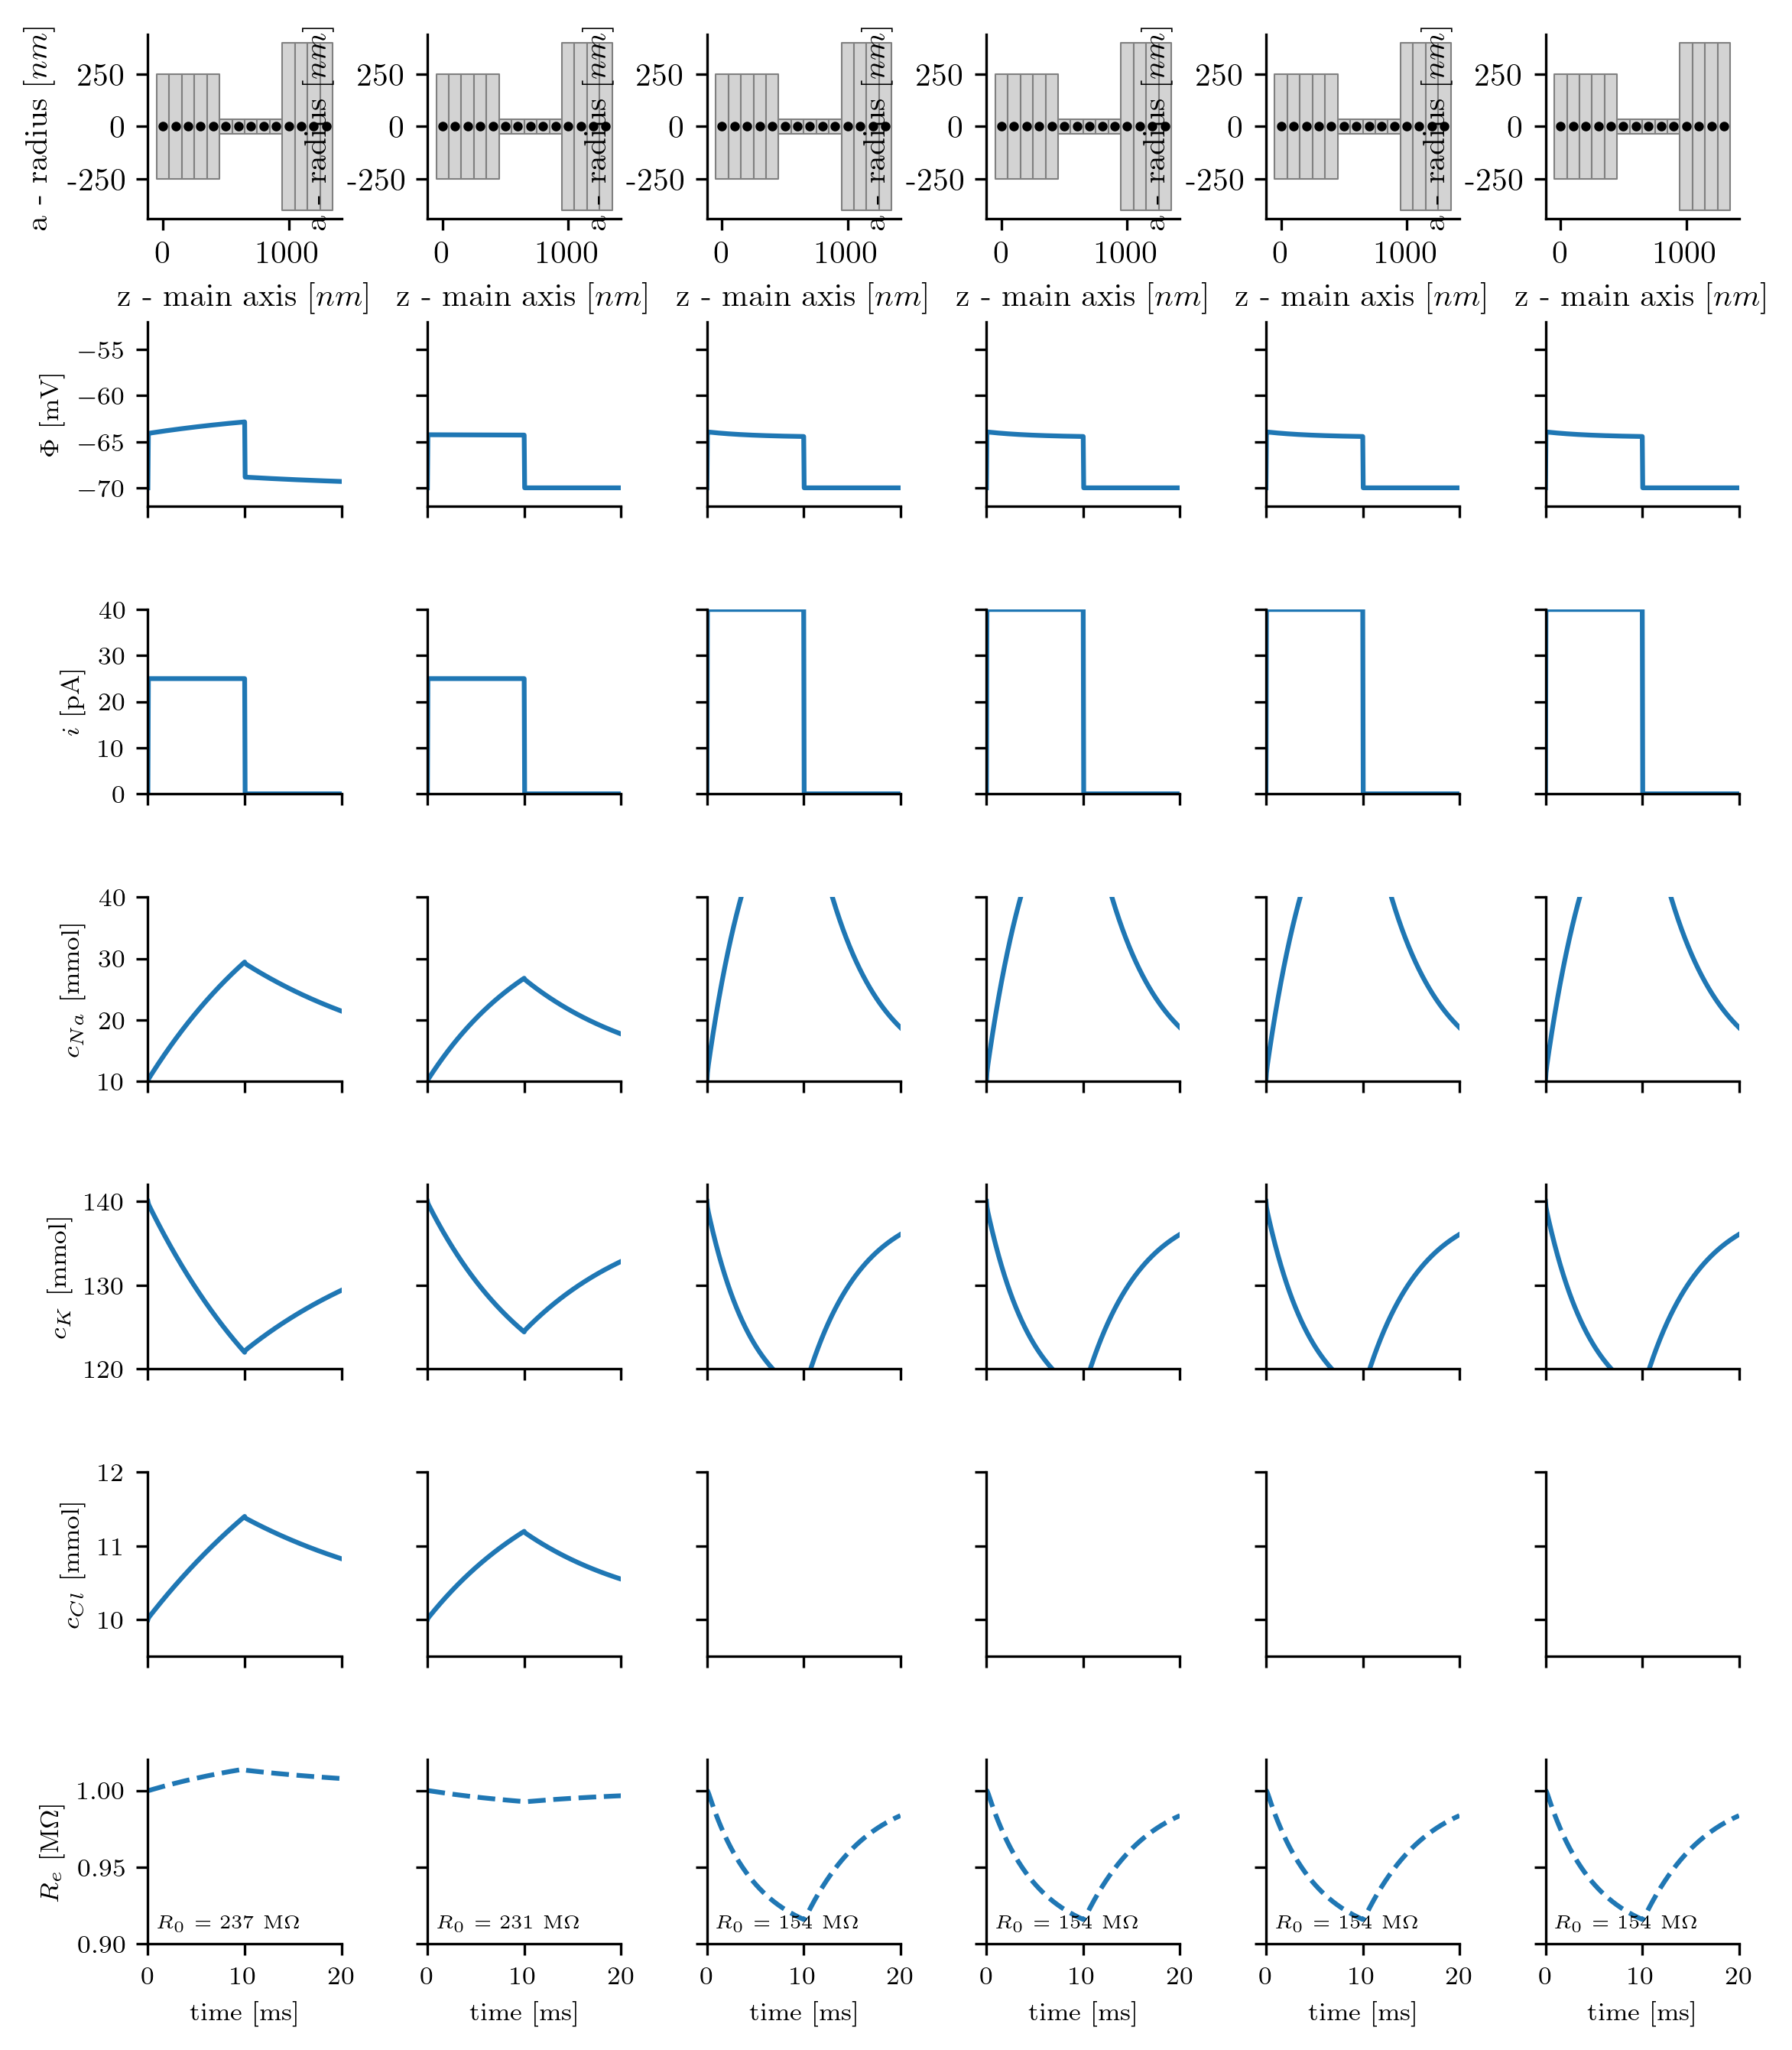

In [51]:
def axs_head_overview(fig, column, n_columns, file_id, make_y_label=True):
    
    (
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    
    cum_R = np.cumsum(1./g_ij, axis=1)
    cum_R2 = np.cumsum(R_e, axis=1)
    import copy
    i = copy.copy(i_e)
    i[:,0] = i[:,1]
    cum_R3 = np.cumsum(-(phi[:,1:]-phi[:,:-1])/ i, axis=1)

    n_rows = 7
    dx = 0.05
    wx = (1. - n_columns * dx - 0.5 * dx) / n_columns
    x_min = dx + (wx + dx) * (column - 1)
    x_max = x_min + wx
    dy = 0.05
    wy = (1. - n_rows * dy - 0.5 * dy) / n_rows
    y_min = [dy + (wy + dy) * nr for nr in range(n_rows-1,-1,-1)]
    
    #ax1 = fig.add_axes([x_min, y_min[0], wx, wy])
    ax2 = fig.add_axes([x_min, y_min[1], wx, wy])
    ax3 = fig.add_axes([x_min, y_min[2], wx, wy])
    ax4 = fig.add_axes([x_min, y_min[3], wx, wy])
    ax5 = fig.add_axes([x_min, y_min[4], wx, wy])
    ax6 = fig.add_axes([x_min, y_min[5], wx, wy])
    ax7 = fig.add_axes([x_min, y_min[6], wx, wy])
    
    t_sim,x_sim,a_sim = simulation_parameters['standard']
    plot.x_grid_on_spine(fig, [x_min, y_min[0], wx, wy], x_sim,a_sim)


    ax2.plot(t*1.e3, phi[:,1]*1.e3)
    ax3.plot(t*1.e3, i_total[:,1]*1.e12)
    ax4.plot(t*1.e3, c_Na[:,1])
    ax5.plot(t*1.e3, c_K[:,1])
    ax6.plot(t*1.e3, c_Cl[:,1])
    #ax7.plot(t*1.e3, cum_R2[:,-1]/1.e6)
    ax7.plot(t*1.e3, cum_R[:,-1]/cum_R[0,-1], '--')
    #ax7.plot(t*1.e3, cum_R3[:,-1]/1.e6, '--')

    y_lables = [
        r'$\Phi$ [mV]',
        r'$i$ [pA]',
        r'$c_{Na}$ [mmol]',
        r'$c_K$ [mmol]',
        r'$c_{Cl}$ [mmol]',
        r'$R_e$ [M$\Omega$]',
    ]

    
    for i, ax in enumerate([ ax2, ax3, ax4, ax5, ax6, ax7]):
        ax.tick_params(labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if make_y_label == True:
            ax.set_ylabel(y_lables[i], fontsize=8)
        else: 
            ax.set_yticklabels([])
            
        ax.set_xlabel('')
        ax.set_xticklabels([])
        ax.set_xlim([0 , 20])
        ax.set_xticks([0, 10, 20])
    
    
    # ax7.tick_params(axis='x', labelrotation=90)        
    ax7.set_xlabel('time [ms]', fontsize=8)
    ax7.set_xticklabels(ax7.get_xticks())
    
    ax2.set_ylim((-72, -52))
    ax2.set_yticks([-70,-65,-60,-55])
    
    ax3.set_ylim((0, 40))
    ax3.set_yticks([0,10,20,30,40])
    
    ax4.set_ylim((10, 40))
    ax4.set_yticks([10,20,30,40])
    
    ax5.set_ylim((120, 142))
    ax5.set_yticks([120,130,140])
    
    ax6.set_ylim((9.5, 12))
    ax6.set_yticks([10,11,12])
    
    ax7.set_ylim((0.9, 1.02))
    ax7.set_yticks([0.9,.95,1.0])
    
    ax7.text(1,0.91,'$R_0$  = {r} M$\Omega$'.format(r=round(cum_R[0,-1]/1.e6)), fontsize=6)

fig = plt.figure(dpi=300, figsize=(7.5,9))

axs_head_overview(fig, column=1, n_columns=6, file_id='experiment_1', make_y_label=True)    
axs_head_overview(fig, column=2, n_columns=6, file_id='experiment_2', make_y_label=False)    
axs_head_overview(fig, column=3, n_columns=6, file_id='experiment_8', make_y_label=False)    
axs_head_overview(fig, column=4, n_columns=6, file_id='experiment_8', make_y_label=False)    
axs_head_overview(fig, column=5, n_columns=6, file_id='experiment_8', make_y_label=False)    
axs_head_overview(fig, column=6, n_columns=6, file_id='experiment_8', make_y_label=False)    

plt.show()

# TODO transpose rows and columns